# <span style="color:darkorange"> Exercises 09 (NSL) </span>
# <span style="color:darkorange"> 09.1: Travelling salesman problem (TSP)</span>

The TSP is a <font style="color:darkorange">combinatorial optimization</font> problem which is aimed at <font style="color:darkorange">minimizing the route</font> of a salesman who visits $N$ cities, located in positions ${\{\vec{c}_i\}}_{i=1,...,N}$, <font style="color:darkorange">passing exactly once</font> through each city and <font style="color:darkorange">returning to the starting city</font> at the end. The solution is therefore one of the <font style="color:darkorange">permutations</font> of the cities: the search space has finite cardinality, but grows as $(N-1)!/2$, which demands a great computational effort, if the task is dealt with traditional optimization algorithms.
______

## Genetic algorithm framework

In a nutshell, a GA (genetic algorithm) is a type of evolutionary algorithm, that starts with a population of randomly proposed solutions and alternates between phases of <font style="color:darkorange">random variation</font> and <font style="color:darkorange">natural selection</font>. The latter step is based on <font style="color:darkorange">fitness criteria</font> that are specific to each problem.  

For the TSP, the reasonable <font style="color:darkorange">figure of merit</font> to consider when trying to minimize the total distance travelled is a <font style="color:darkorange">loss function</font> $\mathcal{L}$, constructed as the <font style="color:darkorange">sum of the distances between consecutive cities</font>. Two possible loss functions, that differ by the metric in use, are:

$$
\mathcal{L}^{(1)}\left[ \Pi \right] =
L^{(1)}(\vec{c}_{\Pi_1}, \vec{c}_{\Pi_2}, \dots, \vec{c}_{\Pi_N}) =
\sum_{i=1}^{N} |\vec{c}_{\Pi_{i+1}}-\vec{c}_{\Pi_{i}}|,
\quad \quad
\mathcal{L}^{(2)}\left[ \Pi \right] =
L^{(2)}(\vec{c}_{\Pi_1}, \vec{c}_{\Pi_2}, \dots, \vec{c}_{\Pi_N}) =
\sum_{i=1}^{N} |\vec{c}_{\Pi_{i+1}}-\vec{c}_{\Pi_{i}}|^2,
$$

where $\vec{c}_{\Pi_{N+1}}=\vec{c}_{\Pi_{1}}$, and $\Pi$ represents a <font style="color:darkorange">permutation</font> of the cities.

The <font style="color:darkorange">route</font> of the salesman is <font style="color:darkorange">represented by a row vector</font> $\underline{r}=\left[ r_1 , r_2 , ... , r_N \right]$: its entries are integers from $1$ to $N$ that identify the city and the order in which they appear represents the salesman's path. 

**Notes:**

* <font style="color:darkorange">every number</font> from $1$ to $N$ will appear <font style="color:darkorange">at least once</font> in the vector $\underline{r}$, since every city is visited;

* under the condition of a single visit per city, <font style="color:darkorange">no number can repeat</font> inside the vector;

* the city at the start (and at the end) of the ring track is set to appear always at the beginning of $\underline{r}$, so that the $N$-fold <font style="color:darkorange">degeneracy</font> deriving from the symmetry under <font style="color:darkorange">cyclic permutations</font> of cities is lifted;

* the $2$-fold <font style="color:darkorange">degeneracy</font> corresponding to the invariance of the loss function if a path is travelled in the <font style="color:darkorange">opposite direction</font> is not removed in any way.

___________

## Configurations, mutations, selection criterion and simulation parameters

The configurations chosen for testing the code is that of $N=34$ cities arranged <font style="color:darkorange">along a circumference</font>, which is a mere testing workbench to verify the soundness of the algorithm - at least for the more intuitive Euclidean distance - , or <font style="color:darkorange">inside a square</font>, which is more representative of a realistic hypothetical travel between cities; the positions are generated randomly, then plotted and saved respectively, to files `34citiesCIRCLE.dat` and `34citiesSQUARE.dat`.

Each individual in the population is subject to different types of random <font style="color:darkorange">mutations</font> that might happen with an <font style="color:darkorange">adjustable probability</font>. When two individuals reproduce, they may also undergo <font style="color:darkorange">crossover</font> and exchange information by recombining portions of their genomes. The simulation parameters set in the `run_card.dat` are:


|        genetic algorithm parameters         |        value in run card         |
| ------------------------------------------: | :------------------------------: |
|                 population size $M$         |                      $34^2=1156$ |
|                loss function in use         |                             both |
| pair permutation probability                |                           $10\%$ |
|            shift probability                |                           $10\%$ |
| group permutation probability               |                           $10\%$ |
|        inversion probability                |                           $10\%$ |
|      crossover probability                  |                           $90\%$ |
| number of generations                       |                            $100$ |


The criterion for selection involves <font style="color:darkorange">removing</font> with the highest probability <font style="color:darkorange">the least fit</font> individuals in the population. The <font style="color:darkorange">unfitness parameter</font> that defines the probability of being eliminated is:

$$
P_{death}\left(\underline{r}_i\right) = 
\frac{ \mathcal{L}\left[ individual_i \right] }{ \mathcal{L}\left[ population \right] } =
\frac{ \mathcal{L}\left[ individual_i \right] }{ \sum_{j\in population} \mathcal{L}\left[ individual_j \right] } =
\frac{ \mathcal{L}\left[ \underline{r}_i \right] }{ \sum_{j=1}^{M} \mathcal{L}\left[ \underline{r}_j \right] },
$$

which is properly normalized. When passing to a <font style="color:darkorange">new generation</font>, each individual, i.e. permutation of cities $\underline{r}_i$, gets its unfitness parameter assigned; then, the population, i.e. the collection of all permutations, is sorted by increasing fitness and finally <font style="color:darkorange">$99\%$ of the population is wiped out</font>, by eliminating $\left[ M \times 99\% \right]$ individuals according to their $P_{death}$.

The cartesian coordinates have been saved to '34citiesCIRCLE.dat'


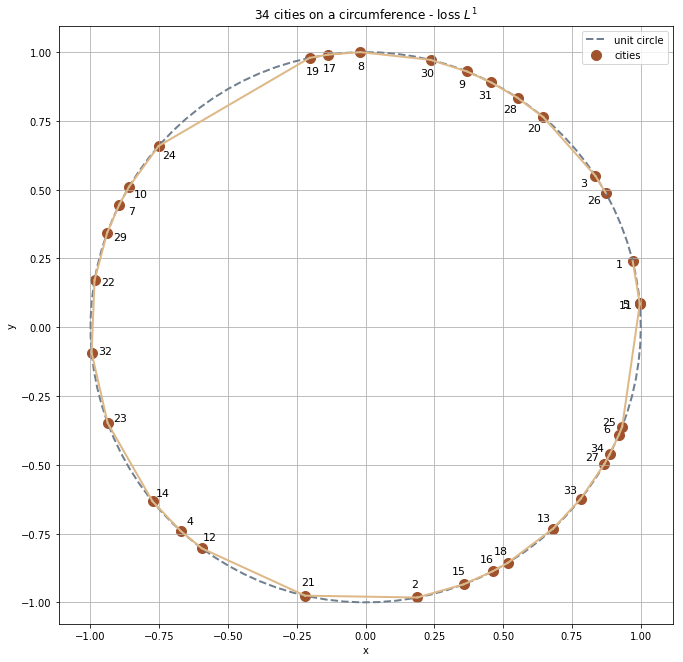

In [93]:
import numpy as np
import matplotlib.pyplot as plt

select_LOSS = 1

# 0: generate canvas
plt.figure(figsize=(11, 11))
# 1: draw the unit circumference the cities are constrained to
theta = np.linspace(0, 2 * np.pi, 100)
x_circle = np.cos(theta)
y_circle = np.sin(theta)
plt.plot(x_circle, y_circle, color='slategray', linestyle='dashed', linewidth=2, label='unit circle')
plt.axis('equal')  # avoids ellipse aspect
# 2.1: generate random angular positions for the N cities
N = 34
np.random.seed(34)  # the seed is fixed for reproducibility
random_angles = np.random.uniform(0., 2. * np.pi, N)
x_points = np.cos(random_angles)  # convert angular positions to cartesian coordinates
y_points = np.sin(random_angles)
# 2.2: save cities positions to a file
data = np.column_stack((np.arange(1, N + 1), x_points, y_points))
np.savetxt(f'{N}citiesCIRCLE.dat', data, fmt='%d %.10f %.10f', comments='')
print(f"The cartesian coordinates have been saved to '{N}citiesCIRCLE.dat'")
# 3: draw cities along
plt.scatter(x_points, y_points, color='sienna', s=100, label=f'cities')
for i, (x, y) in enumerate(zip(x_points, y_points), 1):
    # Calculate offset for text position (to place it radially outwards)
    offset = -0.05  # adjust this value as needed
    text_x = x + offset * np.cos(random_angles[i - 1])
    text_y = y + offset * np.sin(random_angles[i - 1])
    plt.text(text_x, text_y, str(i), fontsize=11, ha='center', va='center')
# 4: read sequence from file and connect cities
sequence_file = f'bestpathCIRCLEloss{select_LOSS}.dat'
sequence = np.loadtxt(sequence_file, dtype=int)
for i in range(len(sequence) - 1):  # Loop until second to last city
    start_idx = sequence[i] - 1
    end_idx = sequence[i + 1] - 1
    plt.plot([x_points[start_idx], x_points[end_idx]], [y_points[start_idx], y_points[end_idx]],linewidth=2, color='burlywood')
plt.title(f'{N} cities on a circumference - loss $L^{select_LOSS}$')
plt.xlabel('x')
plt.ylabel('y')
# 5: finish plot
plt.legend()
plt.grid(True)
plt.show()

## Remark on metrics

As expected, the result using $\mathcal{L}^{(1)}$, i.e. the loss defined as the <font style="color:darkorange">sum of the Euclidean distances</font>, is a <font style="color:darkorange">polygonal chain</font> of length $0<l<2 \pi$ that approximates the circumference from the inside. However, this is <font style="color:darkorange">in general not true</font> if the distance is defined differently, like as in $\mathcal{L}^{(2)}$, as it can be shown by changing the `select_LOSS` parameter above to $2$. 

Consequently, though both plots show that minimization is effective, their performances <font style="color:darkorange">cannot be compared</font>, since it does not really make sense, neither mathematically, nor physically, to compare the values on the $y$-axis.

The path length, averaged over the best half of the population is plotted as well, and it represents the degree of <font style="color:darkorange">homogeneity of the population</font> with respect to the fittest individual, i.e. how closely aligned are the proposals for the optimal path.

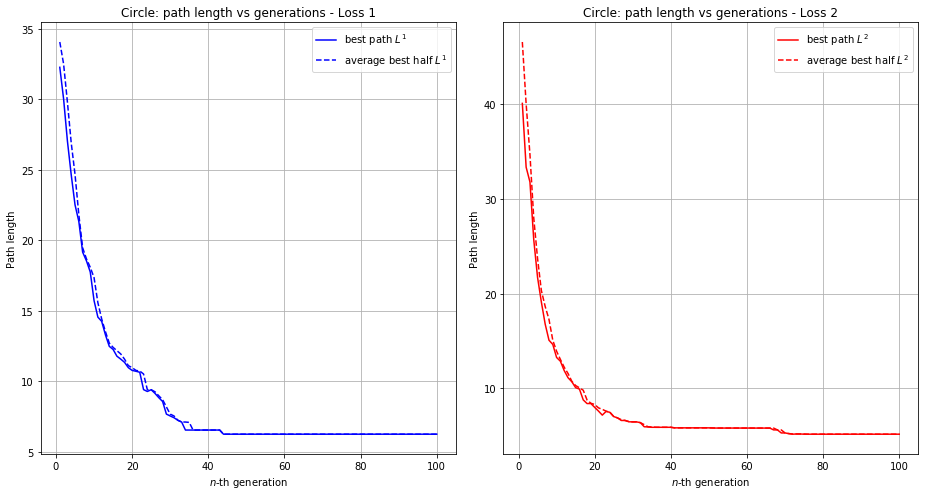

In [91]:
import matplotlib.pyplot as plt

data_file_1 = "decreaseCIRCLE34loss1.dat"
generations_1, best_path_1, average_best_half_1 = [], [], []

with open(data_file_1, 'r') as file:
    for line in file:
        values = line.split()
        generations_1.append(int(values[0]))
        best_path_1.append(float(values[1]))
        average_best_half_1.append(float(values[2]))

plt.figure(figsize=(13, 7))
plt.subplot(1, 2, 1)
plt.plot(generations_1, best_path_1, '-', color='blue', label='best path $L^1$')
plt.plot(generations_1, average_best_half_1, '--', color='blue', label='average best half $L^1$')
plt.xlabel('$n$-th generation')
plt.ylabel('Path length')
plt.title('Circle: path length vs generations - Loss 1')
plt.grid()
plt.legend()

data_file_2 = "decreaseCIRCLE34loss2.dat"
generations_2, best_path_2, average_best_half_2 = [], [], []

with open(data_file_2, 'r') as file:
    for line in file:
        values = line.split()
        generations_2.append(int(values[0]))
        best_path_2.append(float(values[1]))
        average_best_half_2.append(float(values[2]))

plt.subplot(1, 2, 2)
plt.plot(generations_2, best_path_2, '-', color='red', label='best path $L^2$')
plt.plot(generations_2, average_best_half_2, '--', color='red', label='average best half $L^2$')
plt.xlabel('$n$-th generation')
plt.ylabel('Path length')
plt.title('Circle: path length vs generations - Loss 2')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

The cartesian coordinates have been saved to '34citiesSQUARE.dat'


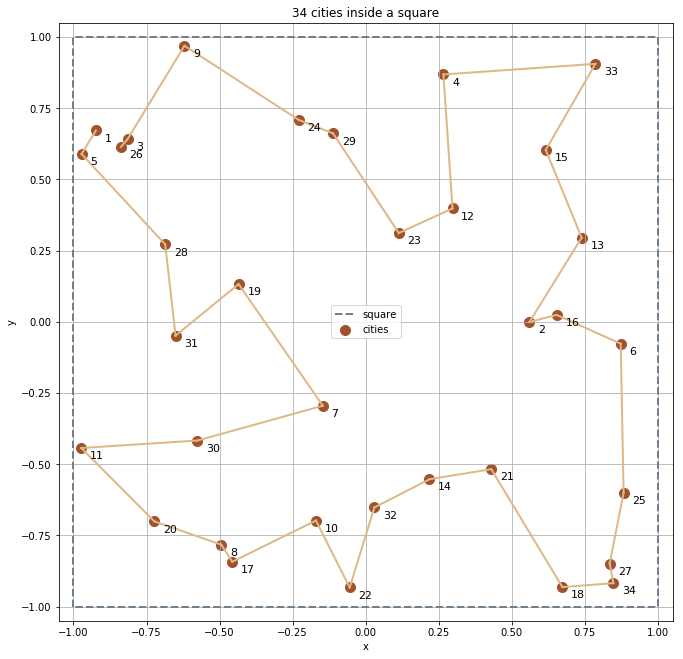

In [97]:
import numpy as np
import matplotlib.pyplot as plt

select_LOSS = 1

# 0: generate canvas
plt.figure(figsize=(11, 11))

# 1: draw the boundary of the square
square_x = [-1, -1, 1, 1, -1]  # X-coordinates of square vertices (to close the loop)
square_y = [-1, 1, 1, -1, -1]   # Y-coordinates of square vertices (to close the loop)
plt.plot(square_x, square_y, color='slategray', linestyle='dashed', linewidth=2, label='square')

# 2.1: generate random positions for the N cities inside the square
N = 34
np.random.seed(34) # the seed is fixed for reproducibility
x_points = np.random.uniform(-1, 1, N)
y_points = np.random.uniform(-1, 1, N)

# 2.2: save cities positions to a file
data = np.column_stack((np.arange(1, N + 1), x_points, y_points))
np.savetxt(f'{N}citiesSQUARE.dat', data, fmt='%d %.10f %.10f', comments='')
print(f"The cartesian coordinates have been saved to '{N}citiesSQUARE.dat'")

# 3: draw cities inside the square
plt.scatter(x_points, y_points, color='sienna', s=100, label=f'cities')
for i, (x, y) in enumerate(zip(x_points, y_points), 1):
    plt.text(x + 0.03, y - 0.01, str(i), fontsize=11, ha='left', va='top')  # offset for label position

# 4: read sequence from file and connect cities
sequence_file = f'bestpathSQUAREloss{select_LOSS}.dat'
sequence = np.loadtxt(sequence_file, dtype=int)

for i in range(len(sequence) - 1):  # Loop until second to last city
    start_idx = sequence[i] - 1
    end_idx = sequence[i + 1] - 1
    plt.plot([x_points[start_idx], x_points[end_idx]], [y_points[start_idx], y_points[end_idx]],linewidth=2, color='burlywood')

plt.title(f'{N} cities inside a square')
plt.xlabel('x')
plt.ylabel('y')

# 5: finish plot
plt.legend()
plt.grid(True)
plt.xlim(-1.05, 1.05) 
plt.ylim(-1.05, 1.05)
plt.show()

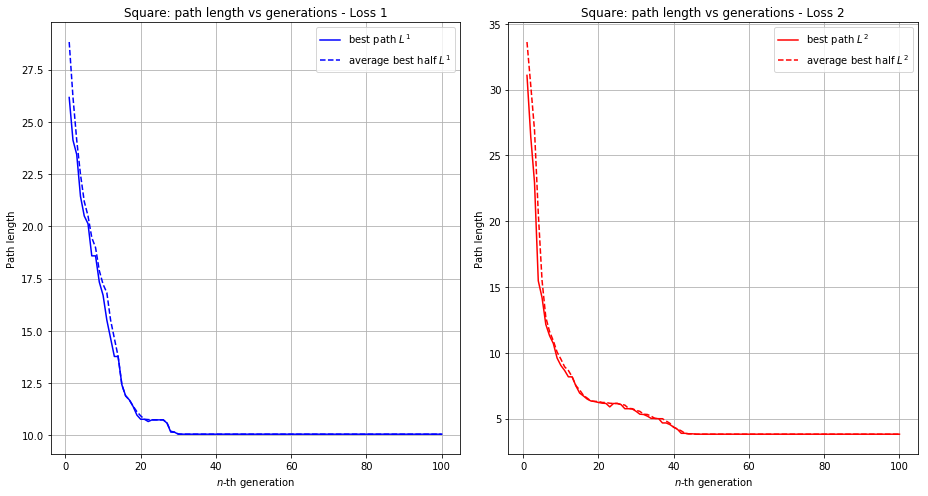

In [94]:
import matplotlib.pyplot as plt

data_file_1 = "decreaseSQUARE34loss1.dat"
generations_1, best_path_1, average_best_half_1 = [], [], []

with open(data_file_1, 'r') as file:
    for line in file:
        values = line.split()
        generations_1.append(int(values[0]))
        best_path_1.append(float(values[1]))
        average_best_half_1.append(float(values[2]))

plt.figure(figsize=(13, 7))
plt.subplot(1, 2, 1)
plt.plot(generations_1, best_path_1, '-', color='blue', label='best path $L^1$')
plt.plot(generations_1, average_best_half_1, '--', color='blue', label='average best half $L^1$')
plt.xlabel('$n$-th generation')
plt.ylabel('Path length')
plt.title('Square: path length vs generations - Loss 1')
#plt.ylim(10,10.25)
plt.grid()
plt.legend()

data_file_2 = "decreaseSQUARE34loss2.dat"
generations_2, best_path_2, average_best_half_2 = [], [], []

with open(data_file_2, 'r') as file:
    for line in file:
        values = line.split()
        generations_2.append(int(values[0]))
        best_path_2.append(float(values[1]))
        average_best_half_2.append(float(values[2]))

plt.subplot(1, 2, 2)
plt.plot(generations_2, best_path_2, '-', color='red', label='best path $L^2$')
plt.plot(generations_2, average_best_half_2, '--', color='red', label='average best half $L^2$')
plt.xlabel('$n$-th generation')
plt.ylabel('Path length')
plt.title('Square: path length vs generations - Loss 2')
#plt.ylim(3.75,4)
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()